In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_union

In [0]:
url = 'https://raw.githubusercontent.com/micklwl/cs3244/master/dataset.csv'
data = pd.read_csv(url, sep =',')
data

,Insult,Comment
0,1,you fuck your dad
1,0,i really do not understand your point it seem...
2,0,a majority of canadians can and has been wron...
3,0,listen if you dont wanna get married to a man ...
4,0,các bạn xuống đường biểu tình 2011 có ôn hoà k...
...,...,...
168313,0,never really gave it much thought i just figur...
168314,0,nadie se salva de la regla 34 xd
168315,0,question are you a boy or a girl
168316,1,leave your email or phone number and maybe you...


In [0]:
train, test = train_test_split(data, test_size=0.2, shuffle= True)

In [0]:
train_values = train["Insult"].values
train_comments = train["Comment"]
test_values = test["Insult"].values
test_comments = test["Comment"]

In [0]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf = True,
    strip_accents = 'unicode',
    analyzer = 'word',
    token_pattern = r'\w{1,}',
    stop_words = 'english',
    ngram_range = (1, 1),
    max_features = 30000
)
train_vectors = word_vectorizer.fit_transform(train_comments)
test_vectors = word_vectorizer.transform(test_comments)

In [0]:
train_target = train['Insult']
classifier = LogisticRegression(C = 0.1, solver = 'sag')
classifier.fit(train_vectors, train_target)
predicted = classifier.predict(test_vectors)
predicted

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
test_values

array([0, 0, 0, ..., 0, 1, 0])

In [0]:
print("Test accuracy: ", accuracy_score(test_values, predicted))

Test accuracy:  0.9245484790874525


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test_values, predicted)
print("Confusion matrix:\n", confusion_matrix)

Confusion matrix:
 [[29728   131]
 [ 2409  1396]]


In [0]:
from sklearn.metrics import classification_report
print(classification_report(test_values, predicted))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     29859
           1       0.91      0.37      0.52      3805

    accuracy                           0.92     33664
   macro avg       0.92      0.68      0.74     33664
weighted avg       0.92      0.92      0.91     33664



[[29728   131]
 [ 2409  1396]]
Test accuracy:  0.9245484790874525
Test precision:  0.9142108709888671
Test recall:  0.3668856767411301


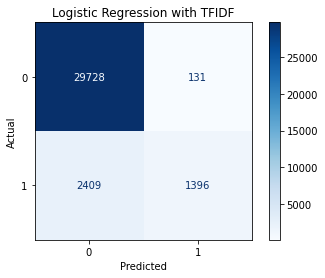

In [0]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)

disp = plot_confusion_matrix(classifier, test_vectors,test_values,cmap=plt.cm.Blues,values_format = 'd') #test_values is true values, test_features is the input to be given to be tested, classifier is model name
disp.ax_.set_title("Logistic Regression with TFIDF")
disp.ax_.set_xlabel("Predicted")
disp.ax_.set_ylabel("Actual")


print(disp.confusion_matrix)
print("Test accuracy: ", metrics.accuracy_score(test_values, predicted))
print("Test precision: ", metrics.precision_score(test_values, predicted))
print("Test recall: ", metrics.recall_score(test_values, predicted))

In [0]:
classifier.predict(word_vectorizer.transform(["fcking @sshole stup1d p1ece of sh1t"]))

array([0])